In [41]:
import graphlab as gl
import numpy as np

In [3]:
data_path = '/Users/kunpengliu/Documents/Data/secure_mining/weatherHistory.csv'
data = gl.SFrame.read_csv(data_path)

Finished parsing file /Users/kunpengliu/Documents/Data/secure_mining/weatherHistory.csv

Parsing completed. Parsed 100 lines in 0.208825 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/kunpengliu/Documents/Data/secure_mining/weatherHistory.csv

Parsing completed. Parsed 96453 lines in 0.257505 secs.

In [88]:
data_use = data['Temperature (C)','Apparent Temperature (C)','Humidity','Wind Speed (km/h)',
               'Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']
data_train = data_use[0:60000]
data_test = data_use[60000:-1]
y_train = data_train['Temperature (C)']
x_train = data_train['Apparent Temperature (C)','Humidity','Wind Speed (km/h)',
               'Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']
y_test = data_test['Temperature (C)']
x_test = data_test['Apparent Temperature (C)','Humidity','Wind Speed (km/h)',
               'Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']

In [89]:
x_train = np.mat(x_train.to_numpy())
y_train = np.mat(y_train.to_numpy()).T
x_test = np.mat(x_test.to_numpy())
y_test = np.mat(y_test.to_numpy()).T
beta = (x_train.T*x_train).I*x_train.T*y_train
beta

matrix([[  8.84954724e-01],
        [ -5.09475762e-01],
        [  9.58893473e-02],
        [ -9.61177145e-05],
        [  2.20720923e-02],
        [  1.43822279e-03]])

In [128]:
y_evl = x_test*beta
a = abs(y_evl-y_test)/abs(y_test+0.0001)
c = abs(y_evl-y_test)
b = a.tolist()
print sorted(b)

[[6.434083640279754e-08], [6.395904448841969e-07], [2.403541064370083e-06], [5.226939514085428e-06], [6.718298405104109e-06], [1.3356468377388292e-05], [1.4623782050281439e-05], [1.5111378285750367e-05], [1.991128371553186e-05], [2.1757342217901886e-05], [2.4900861836121144e-05], [2.6900887415015413e-05], [2.9518692294809394e-05], [3.366514170087318e-05], [3.421619379485716e-05], [3.49395805692466e-05], [3.663262651575923e-05], [3.684436276666864e-05], [4.33854642123552e-05], [4.3924735333704797e-05], [4.430344657616033e-05], [4.459807450599769e-05], [4.555575051523212e-05], [4.8532764362773e-05], [4.921680165885449e-05], [5.010997838001488e-05], [5.1018496632723544e-05], [5.166077024986253e-05], [5.707524119875414e-05], [6.187932513306679e-05], [6.846413331368701e-05], [7.004491844280986e-05], [7.080268224400747e-05], [7.163061209875007e-05], [7.2638910233095e-05], [7.344092964376178e-05], [7.944086855357926e-05], [8.367732084971587e-05], [8.48094016648485e-05], [9.219213144553813e-05

In [132]:
sum(abs(c))/len(c)

matrix([[ 0.72905181]])

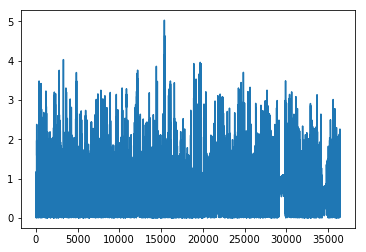

In [129]:
import matplotlib.pyplot as plt
plt.plot(range(0,36452),c)
# plt.gca().invert_xaxis()
plt.show()

In [46]:
import numpy as np
import time
# import 
p = 500  #number of features
n = 5000 # number of samples in each client
# m = 10 #number of clients


X_1 = np.random.randn(n, p)
X_1 = np.mat(X_1)
beta_true_1 = 1.1*np.mat([i for i in range(1, p+1)]).T
y_1 =  X_1*beta_true_1 + 0.0*np.mat(np.random.randn(n,1))

tick1 = time.time()
beta_est_1 = (X_1.T*X_1).I*X_1.T*y_1
beta_est_nu_1 = beta_est_1 - 1/n*X_1.T*(y_1-X_1*beta_est_1)
# X_2 = np.random.randn(n, p)
# X_2 = np.mat(X_2)
# beta_true_2 = 2.2*np.mat([i for i in range(1, p+1)]).T
# y_2 =  X_2*beta_true_2 + 0.2*np.mat(np.random.randn(n,1))
tick2 = time.time()
t = tick2-tick1
print t
# print beta_true_1, '\n',beta_est_1,'\n',beta_est_nu_1,t

0.0559501647949


In [53]:
# beta_est_1 = (X_1.T*X_1).I*X_1.T*y_1
# beta_est_2 = (X_2.T*X_2).I*X_2.T*y_2
# print beta_est_1-beta_true_1,beta_est_2-beta_true_2

In [109]:
import numpy as np
from numpy import linalg as LA
import time
p = 500 # number of features
m = 50 # number of clients
P = np.random.randn(p, m)
TD = P[:,1]
Flag = np.ones((p,1))

tick3 = time.time()
for i in range(0,p,1):
    if LA.norm(P[i,:])>=TD[i]:
        Flag[i]== 1
    else:
        Flag[i] == 0    
tick4 = time.time()

t = tick4-tick3
print t

0.00439882278442
